# PyTorch Overfitting 해결: Regularization, 데이터 증강

과적합(Overfitting)은 머신러닝 및 딥러닝 모델이 학습 데이터에 너무 잘 맞춰져 새로운 데이터에 대한 일반화 성능이 저하되는 현상을 말합니다. 이를 해결하기 위해 다양한 기법들이 존재하며, 이번 가이드에서는 Regularization, Data Augmentation을 중점적으로 다룹니다.

## 1. Regularization

Regularization은 모델의 복잡도를 제한하여 과적합을 방지하는 기법입니다. 주로 모델의 파라미터에 제약을 가함으로써 모델이 학습 데이터에 과도하게 맞추어지는 것을 방지합니다.

즉, 모델이 학습 데이터를 '너무 잘' 학습하는 것을 방지하는 기법입니다.
예를 들어, 시험 문제의 답만 외우는 것이 아니라 개념을 이해하도록 하는 것과 비슷합니다.

### 1.1 Regularization이란?

Regularization은 모델이 학습 데이터를 과도하게 학습하는 것을 방지하는 기법입니다.

실제 환경에서도 잘 동작하도록 모델을 일반화하는 것이 목적입니다.

### 1.2. 기본 예제 코드

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 재현성을 위한 시드 설정
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
# 간단한 예제 데이터 생성 (비선형 데이터)
X = torch.linspace(-5, 5, 200).reshape(-1, 1)
y = 0.2 * (X ** 3) + torch.randn_like(X)

In [ ]:
# 기본 모델 정의
class SimpleModel(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.layers(x)

- SimpleModel: 3개의 선형 층을 가진 기본 신경망 모델입니다.

In [ ]:
# Regularization을 적용한 학습 함수
def train_with_regularization(model, X, y, l2_lambda=0.0, epochs=1000):
    """
    모델을 학습시키는 함수

    매개변수:
        model: 학습할 모델
        X: 입력 데이터
        y: 정답 데이터
        l2_lambda: L2 Regularization 강도
        epochs: 학습 반복 횟수
    """
    optimizer = optim.Adam(model.parameters(), weight_decay=l2_lambda)
    criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)

        # 기본 손실 계산
        loss = criterion(y_pred, y)

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            losses.append(loss.item())
            print(f'에폭 {epoch}/{epochs}, 손실: {loss.item():.4f}')

    return losses

- train_with_regularization: L2 Regularization을 적용하여 모델을 학습시키는 함수입니다.

    - weight_decay 매개변수가 L2 Regularization의 강도를 조절합니다.

In [ ]:
# Regularization 비교 실험
def compare_regularization():
    # 두 개의 동일한 모델 생성
    model_no_reg = SimpleModel()
    model_with_reg = SimpleModel()

    # Regularization 없이 학습
    print("\n=== Regularization 없이 학습 ===")
    losses_no_reg = train_with_regularization(model_no_reg, X, y, l2_lambda=0.0)

    # L2 Regularization 적용하여 학습
    print("\n=== L2 Regularization 적용하여 학습 ===")
    losses_with_reg = train_with_regularization(model_with_reg, X, y, l2_lambda=0.01)

    # 결과 시각화
    plt.figure(figsize=(15, 5))

    # 학습 곡선
    plt.subplot(1, 2, 1)
    plt.plot(losses_no_reg, label='Regularization 없음')
    plt.plot(losses_with_reg, label='L2 Regularization')
    plt.title('학습 과정에서의 손실 변화')
    plt.xlabel('에폭 (x100)')
    plt.ylabel('손실')
    plt.legend()

    # 예측 결과
    plt.subplot(1, 2, 2)
    with torch.no_grad():
        y_pred_no_reg = model_no_reg(X)
        y_pred_reg = model_with_reg(X)

    plt.scatter(X.numpy(), y.numpy(), alpha=0.3, label='실제 데이터')
    plt.plot(X.numpy(), y_pred_no_reg.numpy(), 'r-', label='Regularization 없음')
    plt.plot(X.numpy(), y_pred_reg.numpy(), 'g-', label='L2 Regularization')
    plt.title('예측 결과 비교')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()


=== Regularization 없이 학습 ===
에폭 0/1000, 손실: 87.2415
에폭 100/1000, 손실: 11.2887
에폭 200/1000, 손실: 5.8993
에폭 300/1000, 손실: 3.2064
에폭 400/1000, 손실: 1.9973
에폭 500/1000, 손실: 1.3763
에폭 600/1000, 손실: 1.1015
에폭 700/1000, 손실: 0.9836
에폭 800/1000, 손실: 0.9282
에폭 900/1000, 손실: 0.8992

=== L2 Regularization 적용하여 학습 ===
에폭 0/1000, 손실: 93.7906
에폭 100/1000, 손실: 13.4724
에폭 200/1000, 손실: 5.3597
에폭 300/1000, 손실: 2.8127
에폭 400/1000, 손실: 1.7146
에폭 500/1000, 손실: 1.2412
에폭 600/1000, 손실: 1.0354
에폭 700/1000, 손실: 0.9256
에폭 800/1000, 손실: 0.8770
에폭 900/1000, 손실: 0.8617


<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 49552 (\N{HANGUL SYLLABLE SON}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from current font.
  plt.tight_layout()
<ipython-input-5-2cae58b7e289>:41: UserWarning: Glyph 51221 (\N

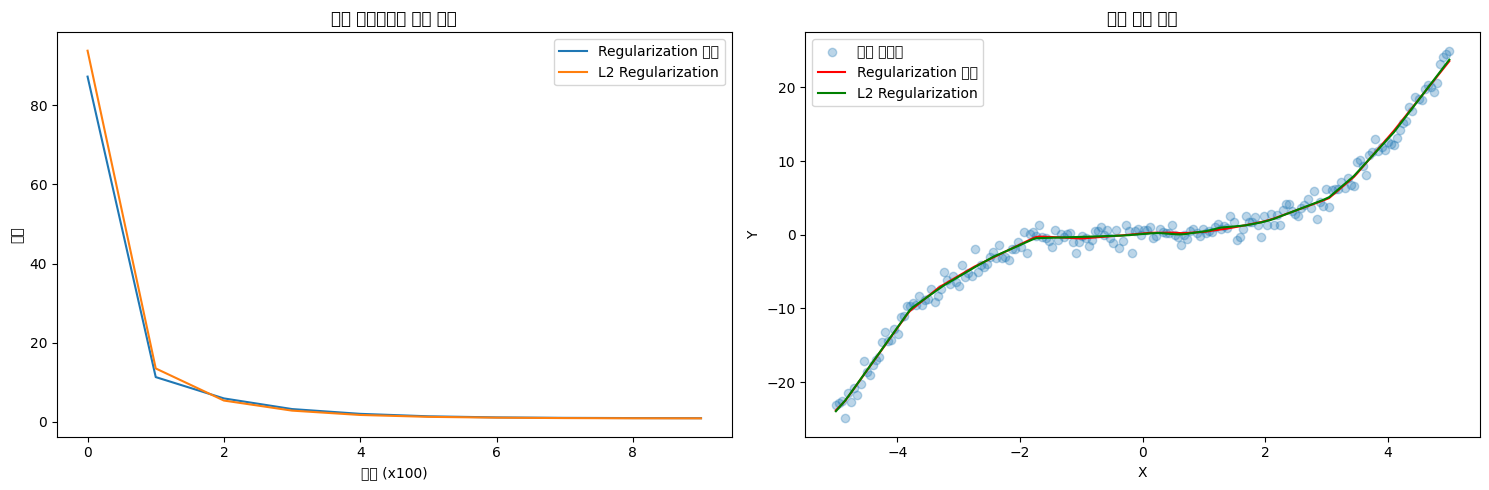

In [ ]:
# 실험 실행
compare_regularization()

compare_regularization: Regularization 적용 유무에 따른 결과를 비교합니다.

## 2. Data Augmentation

### 2.1. 기본 Data Augmentation 예제

이미지 Data Augmentation은 모델이 다양한 형태의 데이터를 학습하도록 도와 일반화 성능을 향상시키는 기법입니다.

다음 예제에서는 CIFAR-10 데이터셋에 다양한 Augmentation 기법을 적용하는 방법을 살펴봅니다.

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from PIL import Image

In [ ]:
# 데이터 증강을 위한 변환 정의
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),         # 좌우 반전
    transforms.RandomRotation(10),             # 회전
    transforms.RandomResizedCrop(32,           # 무작위 크롭
                               scale=(0.8, 1.0),
                               ratio=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2,     # 색상 변경
                         contrast=0.2,
                         saturation=0.2),
    transforms.ToTensor(),                     # 텐서로 변환
    transforms.Normalize((0.5, 0.5, 0.5),      # 정규화
                       (0.5, 0.5, 0.5))
])

- train_transform: 다양한 데이터 증강 기법을 조합한 변환 파이프라인입니다.

    - RandomHorizontalFlip: 좌우 반전
    - RandomRotation: 회전
    - RandomResizedCrop: 크기 조정 및 자르기
    - ColorJitter: 색상 조정

In [ ]:
# 테스트용 기본 변환
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                       (0.5, 0.5, 0.5))
])

- test_transform: 테스트 데이터용 기본 변환입니다.

In [ ]:
def load_and_augment_data():
    """증강된 데이터셋 로드"""
    # 학습 데이터 (증강 적용)
    train_dataset = CIFAR10(root='./data',
                           train=True,
                           download=True,
                           transform=train_transform)

    # 테스트 데이터 (기본 변환만 적용)
    test_dataset = CIFAR10(root='./data',
                          train=False,
                          download=True,
                          transform=test_transform)

    # DataLoader 생성
    train_loader = DataLoader(train_dataset,
                            batch_size=32,
                            shuffle=True)

    test_loader = DataLoader(test_dataset,
                            batch_size=32,
                            shuffle=False)

    return train_loader, test_loader


In [ ]:
def visualize_augmentations(dataset, num_samples=5):
    """데이터 증강 결과 시각화"""
    plt.figure(figsize=(15, 3))

    # 원본 이미지
    image, _ = dataset[0]
    plt.subplot(1, num_samples+1, 1)
    plt.imshow(transforms.ToPILImage()(image))
    plt.title('원본')
    plt.axis('off')

    # 증강된 이미지들
    for i in range(num_samples):
        image, _ = dataset[0]  # 같은 이미지에 다른 증강 적용
        plt.subplot(1, num_samples+1, i+2)
        plt.imshow(transforms.ToPILImage()(image))
        plt.title(f'증강 {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

- visualize_augmentations: 증강된 이미지를 시각화하는 함수입니다.

100%|██████████| 170M/170M [00:10<00:00, 16.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


<ipython-input-11-922fbb92a338>:20: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
<ipython-input-11-922fbb92a338>:20: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
<ipython-input-11-922fbb92a338>:20: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-11-922fbb92a338>:20: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151:

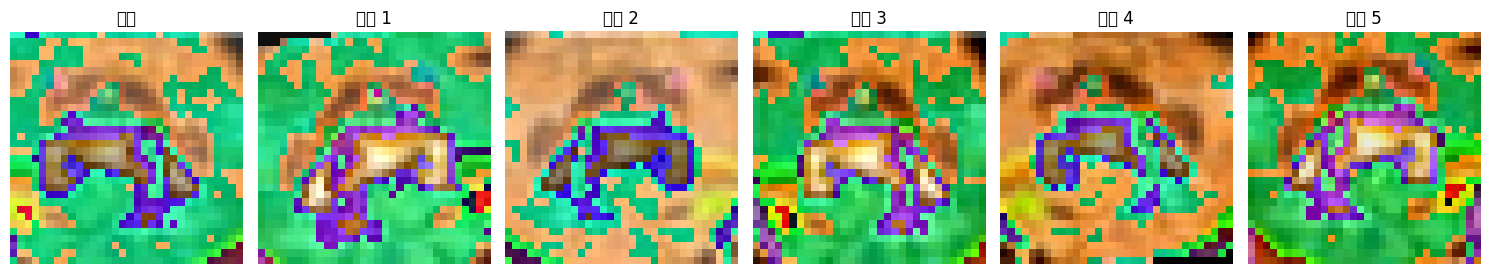

In [ ]:
# 데이터 로드 및 증강 결과 확인
train_loader, test_loader = load_and_augment_data()
visualize_augmentations(train_loader.dataset)

### 실습 과제

1. Regularization 실험


- L2 Regularization의 강도(weight_decay)를 다양하게 변경해보세요.
- Dropout을 추가해보세요.
- 모델의 크기를 변경하며 Regularization 효과를 관찰해보세요.


2. 데이터 증강 실험


- 다른 증강 기법을 추가해보세요.
- 증강 강도를 조절해보세요.
- 여러 증강 기법의 조합을 실험해보세요.

Regularization 실험
- L2 Regularization의 강도(weight_decay)를 다양하게 변경해보세요.
- Dropout을 추가해보세요.
- 모델의 크기를 변경하며 Regularization 효과를 관찰해보세요.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 재현성을 위한 시드 설정
torch.manual_seed(42)
np.random.seed(42)


# 간단한 예제 데이터 생성 (비선형 데이터)
X = torch.linspace(-5, 5, 200).reshape(-1, 1)
y = 0.2 * (X ** 3) + torch.randn_like(X)

# 기본 모델 정의
class SimpleModel(nn.Module):
    def __init__(self, hidden_size=64):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [2]:
# Regularization을 적용한 학습 함수
def train_with_l2_regularization(model, X, y, l2_lambda=0.0, epochs=1000):
    optimizer = optim.Adam(model.parameters(), weight_decay=l2_lambda)
    criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)

        # 기본 손실 계산
        loss = criterion(y_pred, y)

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            losses.append(loss.item())
            print(f'에폭 {epoch}/{epochs}, 손실: {loss.item():.4f}')

    return losses

In [3]:
# Regularization 비교 실험
def l2_regularization():
    for l2_lambda in [0.0, 0.1, 1.0, 2.0]:
        model_with_reg = SimpleModel()

        # L2 Regularization 적용하여 학습
        print(f"\n=== L2 Regularization 적용하여 학습: {l2_lambda} ===")
        losses_with_reg = train_with_l2_regularization(model_with_reg, X, y, l2_lambda=l2_lambda)

        # 결과 시각화
        plt.figure(figsize=(15, 10))

        # 학습 곡선
        plt.subplot(1, 2, 1)
        plt.plot(losses_with_reg, label=f"L2: {l2_lambda}")
        plt.title('Changes in loss during learning')
        plt.xlabel('epoch (x100)')
        plt.ylabel('loss')
        plt.legend()

        # 예측 결과
        plt.subplot(1, 2, 2)
        with torch.no_grad():
            y_pred_reg = model_with_reg(X)

        plt.scatter(X.numpy(), y.numpy(), alpha=0.3, label='Real Data')
        plt.plot(X.numpy(), y_pred_reg.numpy(), label='L2 Regularization')
        plt.title('Compare prediction results')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

    # plt.tight_layout()
    plt.show()


=== L2 Regularization 적용하여 학습: 0.0 ===
에폭 0/1000, 손실: 87.2415
에폭 100/1000, 손실: 11.2887
에폭 200/1000, 손실: 5.8993
에폭 300/1000, 손실: 3.2064
에폭 400/1000, 손실: 1.9973
에폭 500/1000, 손실: 1.3763
에폭 600/1000, 손실: 1.1015
에폭 700/1000, 손실: 0.9836
에폭 800/1000, 손실: 0.9282
에폭 900/1000, 손실: 0.8992

=== L2 Regularization 적용하여 학습: 0.1 ===
에폭 0/1000, 손실: 93.7906
에폭 100/1000, 손실: 12.9968
에폭 200/1000, 손실: 5.0661
에폭 300/1000, 손실: 2.8913
에폭 400/1000, 손실: 2.1165
에폭 500/1000, 손실: 1.7634
에폭 600/1000, 손실: 1.6192
에폭 700/1000, 손실: 1.4923
에폭 800/1000, 손실: 1.3829
에폭 900/1000, 손실: 1.3528

=== L2 Regularization 적용하여 학습: 1.0 ===
에폭 0/1000, 손실: 97.1505
에폭 100/1000, 손실: 15.3216
에폭 200/1000, 손실: 12.0543
에폭 300/1000, 손실: 9.6959
에폭 400/1000, 손실: 8.5308
에폭 500/1000, 손실: 7.9356
에폭 600/1000, 손실: 7.5276
에폭 700/1000, 손실: 7.2428
에폭 800/1000, 손실: 7.0474
에폭 900/1000, 손실: 6.8751

=== L2 Regularization 적용하여 학습: 2.0 ===
에폭 0/1000, 손실: 91.9983
에폭 100/1000, 손실: 14.8394
에폭 200/1000, 손실: 13.2429
에폭 300/1000, 손실: 12.1581
에폭 400/1000, 손실: 11.3

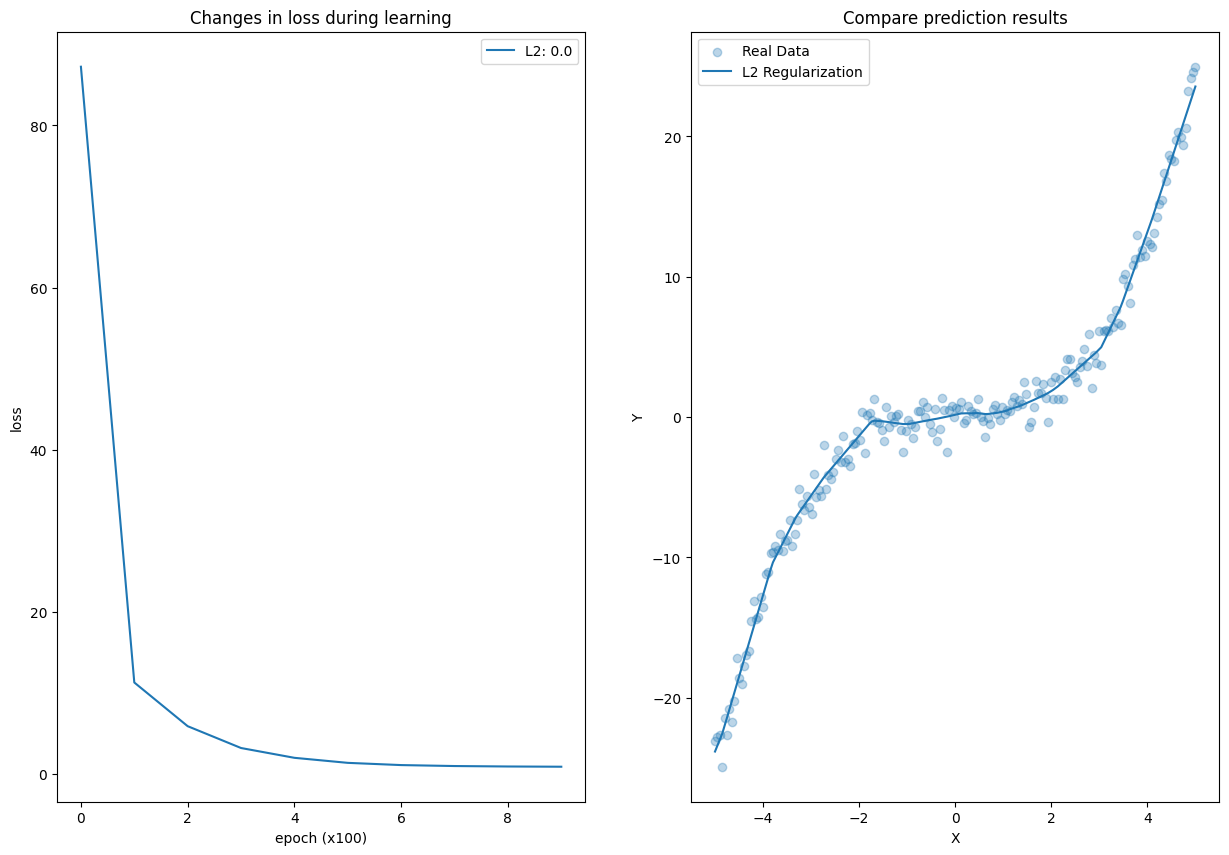

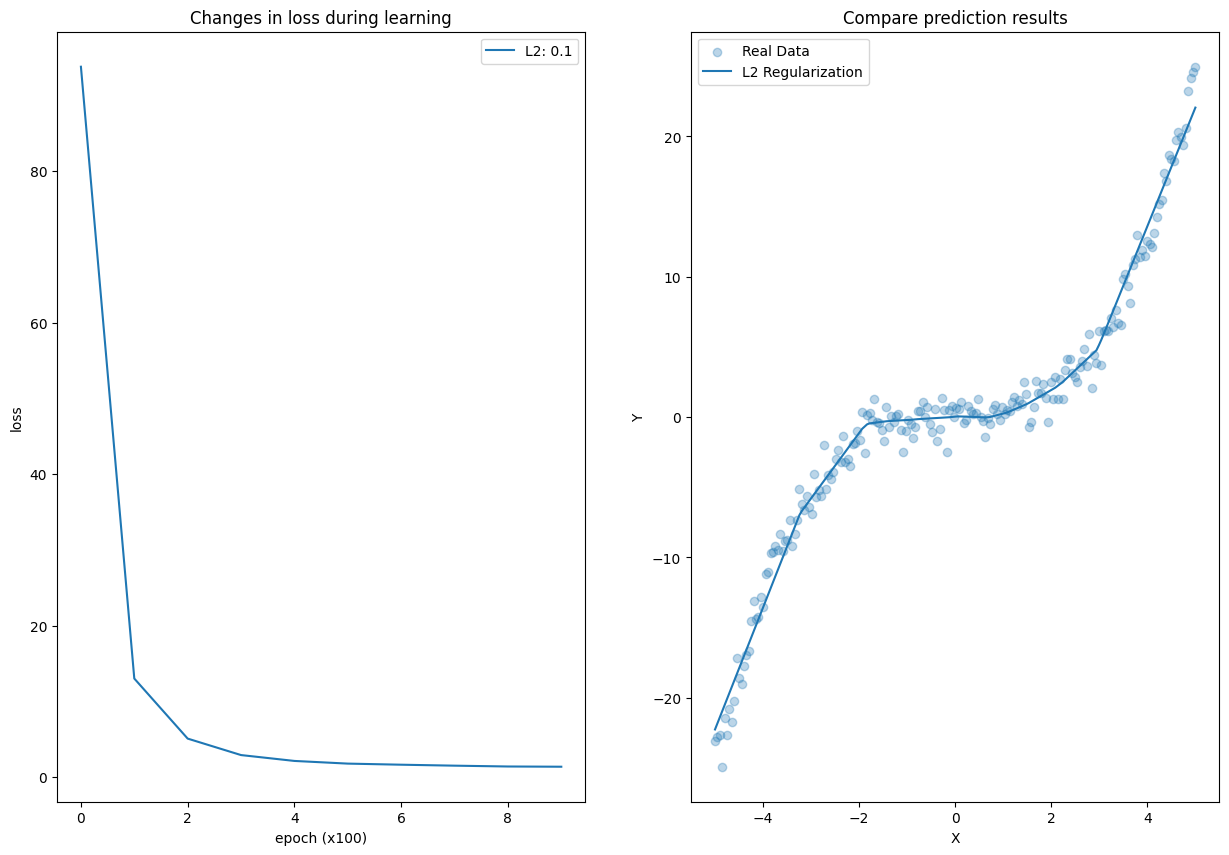

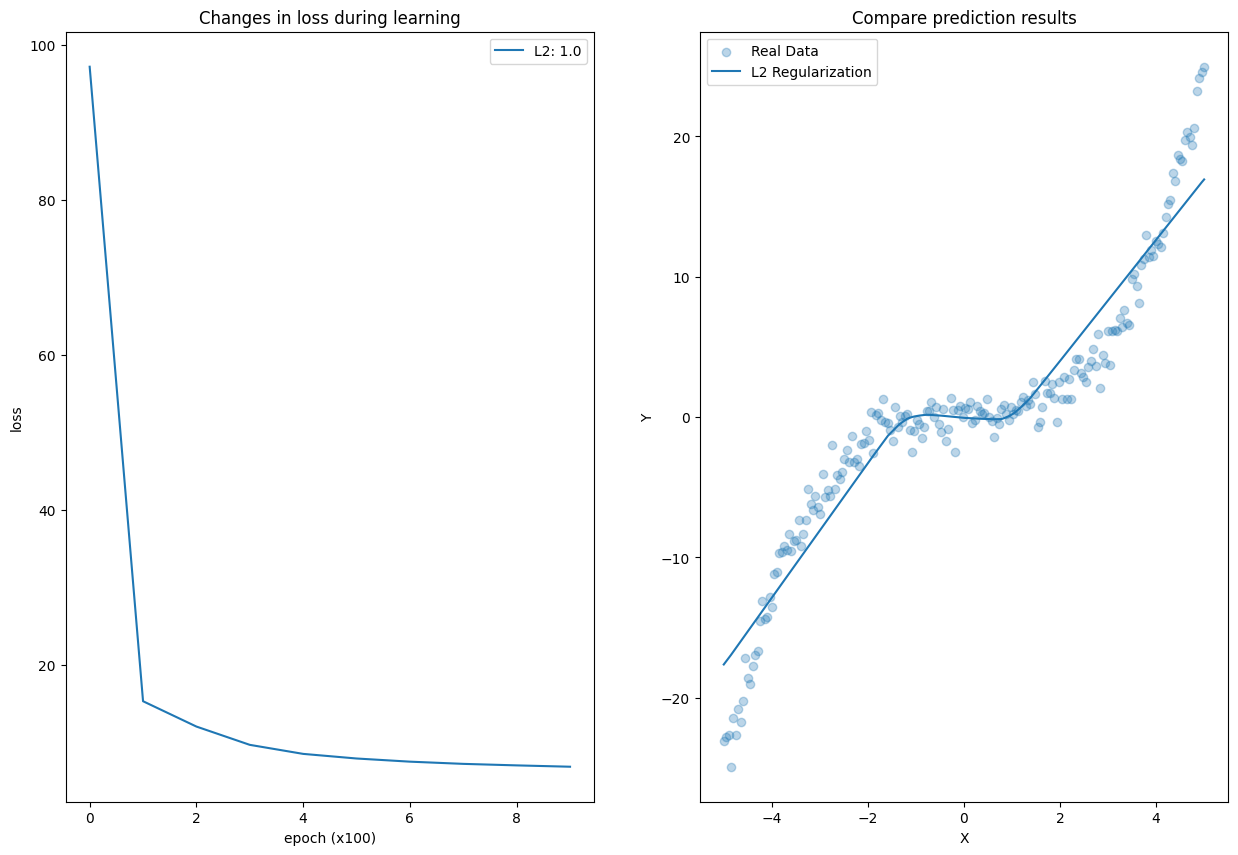

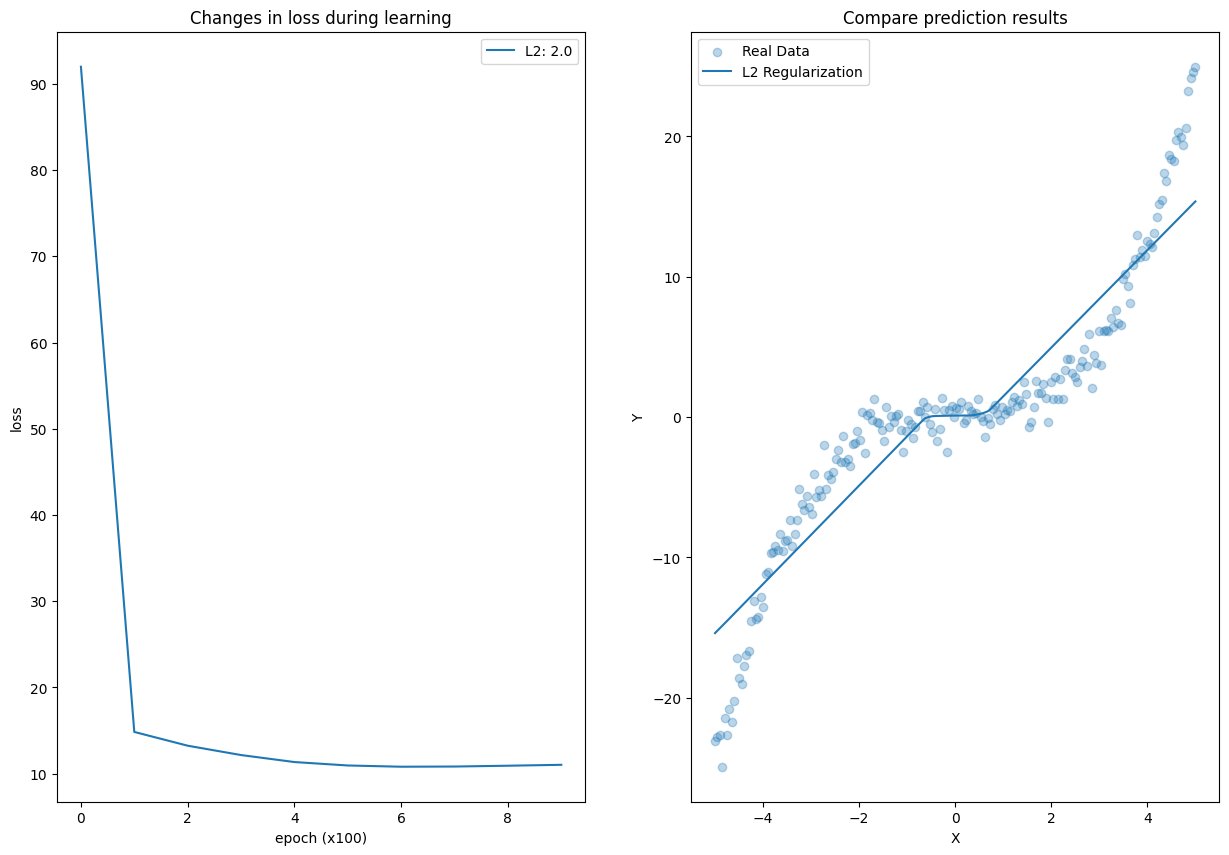

In [4]:
# 실험 실행
l2_regularization()

In [9]:
# Regularization을 적용한 학습 함수
def train_with_l1_regularization(model, X, y, l1_lambda=0.0, epochs=1000):
    optimizer = optim.Adam(model.parameters())
    criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)

        # 기본 손실 계산
        # loss = criterion(y_pred, y)

        # l1_norm = sum(p.abs().sum() for p in model.parameters())
        # loss += l1_lambda * l1_norm

        loss = nn.MSELoss(y_pred, y) + l1_lambda * sum(p.abs().sum() for p in model.parameters())

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            losses.append(loss.item())
            print(f'에폭 {epoch}/{epochs}, 손실: {loss.item():.4f}')

    return losses

In [10]:
# Regularization 비교 실험
def l1_regularization():
    for l1_lambda in [0.0, 0.1, 1.0, 2.0]:
        model_with_reg = SimpleModel()

        # L1 Regularization 적용하여 학습
        print(f"\n=== L1 Regularization 적용하여 학습: {l1_lambda} ===")
        losses_with_reg = train_with_l1_regularization(model_with_reg, X, y, l1_lambda=l1_lambda)

        # 결과 시각화
        plt.figure(figsize=(15, 10))

        # 학습 곡선
        plt.subplot(1, 2, 1)
        plt.plot(losses_with_reg, label=f"L1: {l1_lambda}")
        plt.title('Changes in loss during learning')
        plt.xlabel('epoch (x100)')
        plt.ylabel('loss')
        plt.legend()

        # 예측 결과
        plt.subplot(1, 2, 2)
        with torch.no_grad():
            y_pred_reg = model_with_reg(X)

        plt.scatter(X.numpy(), y.numpy(), alpha=0.3, label='Real Data')
        plt.plot(X.numpy(), y_pred_reg.numpy(), label='L1 Regularization')
        plt.title('Compare prediction results')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

    # plt.tight_layout()
    plt.show()


=== L1 Regularization 적용하여 학습: 0.0 ===
tensor(88.7735, grad_fn=<AddBackward0>)
에폭 0/1000, 손실: 88.7735
tensor(87.0775, grad_fn=<AddBackward0>)
tensor(85.4321, grad_fn=<AddBackward0>)
tensor(83.7952, grad_fn=<AddBackward0>)
tensor(82.1966, grad_fn=<AddBackward0>)
tensor(80.6003, grad_fn=<AddBackward0>)
tensor(79.0012, grad_fn=<AddBackward0>)
tensor(77.4597, grad_fn=<AddBackward0>)
tensor(75.9220, grad_fn=<AddBackward0>)
tensor(74.3821, grad_fn=<AddBackward0>)
tensor(72.8548, grad_fn=<AddBackward0>)
tensor(71.3512, grad_fn=<AddBackward0>)
tensor(69.8693, grad_fn=<AddBackward0>)
tensor(68.3854, grad_fn=<AddBackward0>)
tensor(66.9082, grad_fn=<AddBackward0>)
tensor(65.4415, grad_fn=<AddBackward0>)
tensor(63.9683, grad_fn=<AddBackward0>)
tensor(62.4965, grad_fn=<AddBackward0>)
tensor(61.0326, grad_fn=<AddBackward0>)
tensor(59.5689, grad_fn=<AddBackward0>)
tensor(58.1111, grad_fn=<AddBackward0>)
tensor(56.6556, grad_fn=<AddBackward0>)
tensor(55.1964, grad_fn=<AddBackward0>)
tensor(53.7409, g

KeyboardInterrupt: 

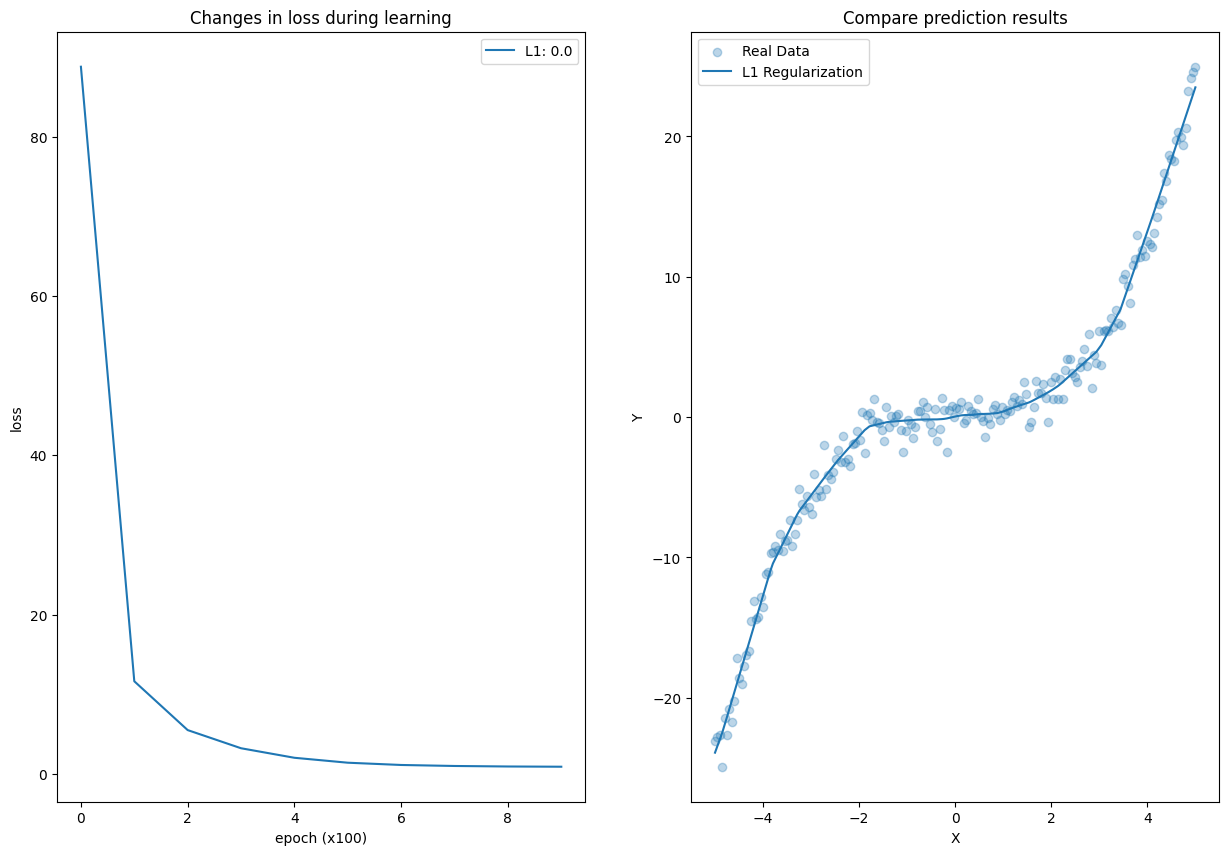

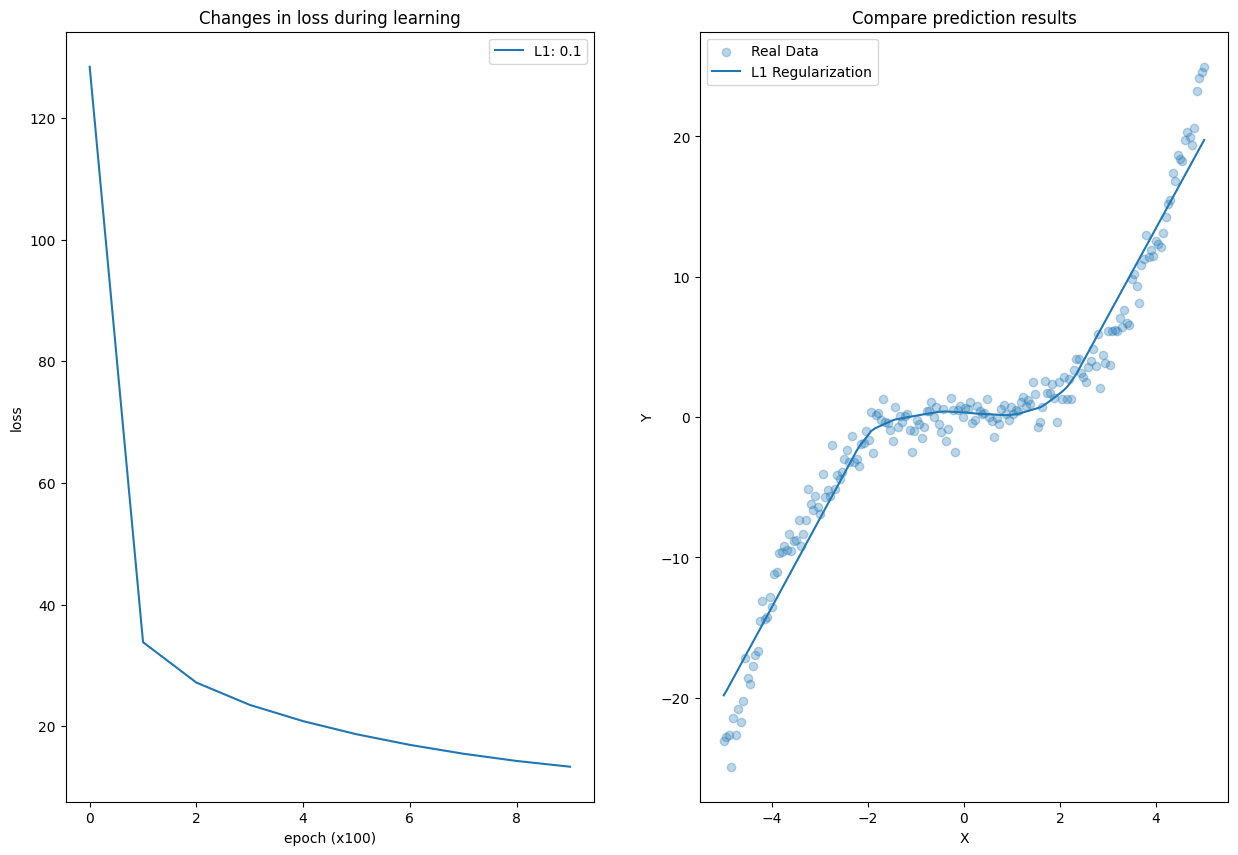

In [11]:
# 실험 실행
l1_regularization()

In [ ]:
#Dropout 추가
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 재현성을 위한 시드 설정
torch.manual_seed(42)
np.random.seed(42)


# 간단한 예제 데이터 생성 (비선형 데이터)
X = torch.linspace(-5, 5, 200).reshape(-1, 1)
y = 0.2 * (X ** 3) + torch.randn_like(X)

# 기본 모델 정의
class SimpleModel(nn.Module):
    def __init__(self, hidden_size=64, dropout_rate=0.5):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        return self.layers(x)

In [ ]:
# Regularization을 적용한 학습 함수
def train_with_l2_regularization(model, X, y, l2_lambda=0.0, epochs=1000):
    optimizer = optim.Adam(model.parameters(), weight_decay=l2_lambda)
    criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X)

        # 기본 손실 계산
        loss = criterion(y_pred, y)

        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            losses.append(loss.item())
            print(f'에폭 {epoch}/{epochs}, 손실: {loss.item():.4f}')

    return losses

In [ ]:
# Regularization 비교 실험
def l2_regularization():
    for l2_lambda in [0.0, 0.1, 1.0, 2.0]:
        model_with_reg = SimpleModel()

        # L2 Regularization 적용하여 학습
        print(f"\n=== L2 Regularization 적용하여 학습: {l2_lambda} ===")
        losses_with_reg = train_with_l2_regularization(model_with_reg, X, y, l2_lambda=l2_lambda)

        # 결과 시각화
        plt.figure(figsize=(15, 10))

        # 학습 곡선
        plt.subplot(1, 2, 1)
        plt.plot(losses_with_reg, label=f"L2: {l2_lambda}")
        plt.title('Changes in loss during learning')
        plt.xlabel('epoch (x100)')
        plt.ylabel('loss')
        plt.legend()

        # 예측 결과
        plt.subplot(1, 2, 2)
        with torch.no_grad():
            y_pred_reg = model_with_reg(X)

        plt.scatter(X.numpy(), y.numpy(), alpha=0.3, label='Real Data')
        plt.plot(X.numpy(), y_pred_reg.numpy(), label='L2 Regularization')
        plt.title('Compare prediction results')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

    # plt.tight_layout()
    plt.show()


=== L2 Regularization 적용하여 학습: 0.0 ===
에폭 0/1000, 손실: 88.7006
에폭 100/1000, 손실: 16.7553
에폭 200/1000, 손실: 14.9786
에폭 300/1000, 손실: 12.0380
에폭 400/1000, 손실: 11.8298
에폭 500/1000, 손실: 7.8846
에폭 600/1000, 손실: 9.6209
에폭 700/1000, 손실: 12.4001
에폭 800/1000, 손실: 8.0663
에폭 900/1000, 손실: 6.7754

=== L2 Regularization 적용하여 학습: 0.1 ===
에폭 0/1000, 손실: 94.9965
에폭 100/1000, 손실: 23.3970
에폭 200/1000, 손실: 16.1605
에폭 300/1000, 손실: 16.4171
에폭 400/1000, 손실: 12.6770
에폭 500/1000, 손실: 13.3881
에폭 600/1000, 손실: 10.1458
에폭 700/1000, 손실: 9.7101
에폭 800/1000, 손실: 10.6087
에폭 900/1000, 손실: 7.6310

=== L2 Regularization 적용하여 학습: 1.0 ===
에폭 0/1000, 손실: 95.1854
에폭 100/1000, 손실: 19.8707
에폭 200/1000, 손실: 21.7540
에폭 300/1000, 손실: 17.2498
에폭 400/1000, 손실: 18.6426
에폭 500/1000, 손실: 17.2484
에폭 600/1000, 손실: 17.3693
에폭 700/1000, 손실: 14.8661
에폭 800/1000, 손실: 15.9158
에폭 900/1000, 손실: 15.1056

=== L2 Regularization 적용하여 학습: 2.0 ===
에폭 0/1000, 손실: 89.8875
에폭 100/1000, 손실: 23.2654
에폭 200/1000, 손실: 17.6228
에폭 300/1000, 손실: 18.1254
에폭 4

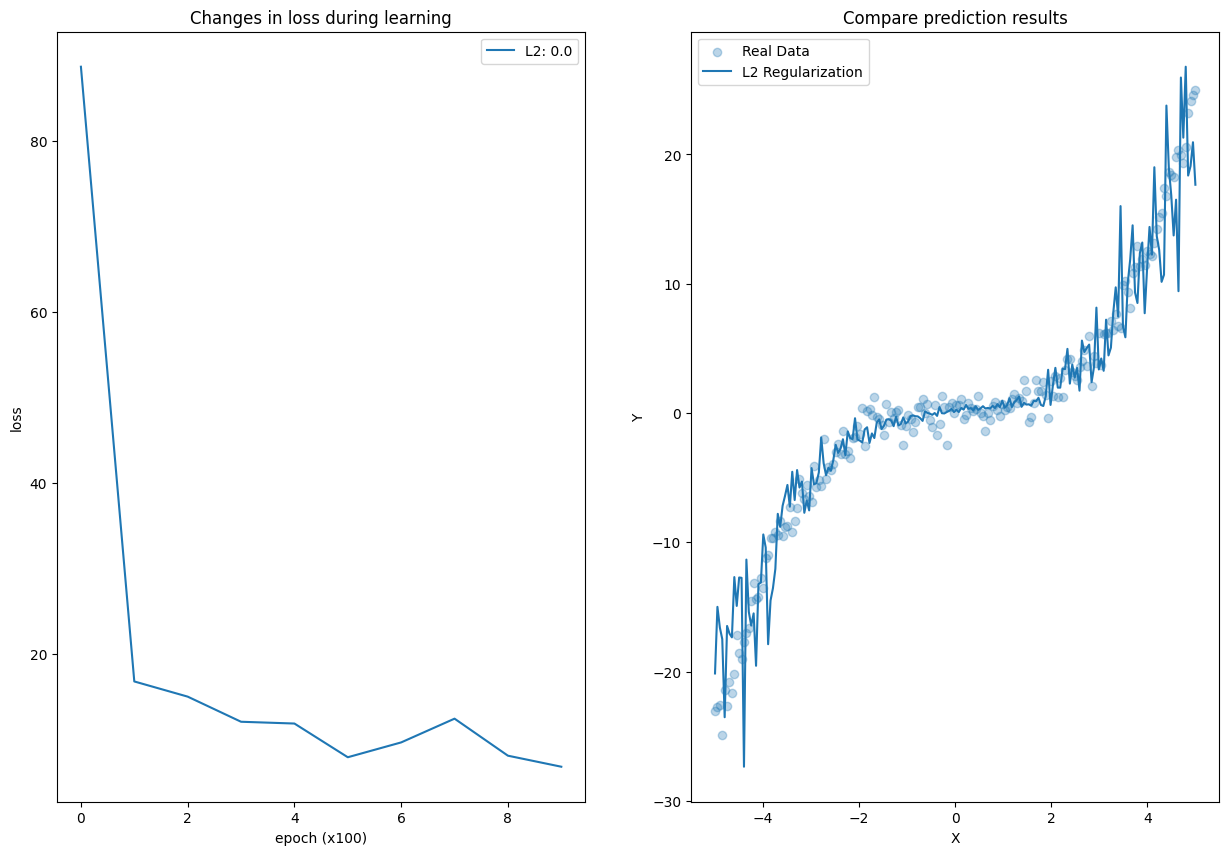

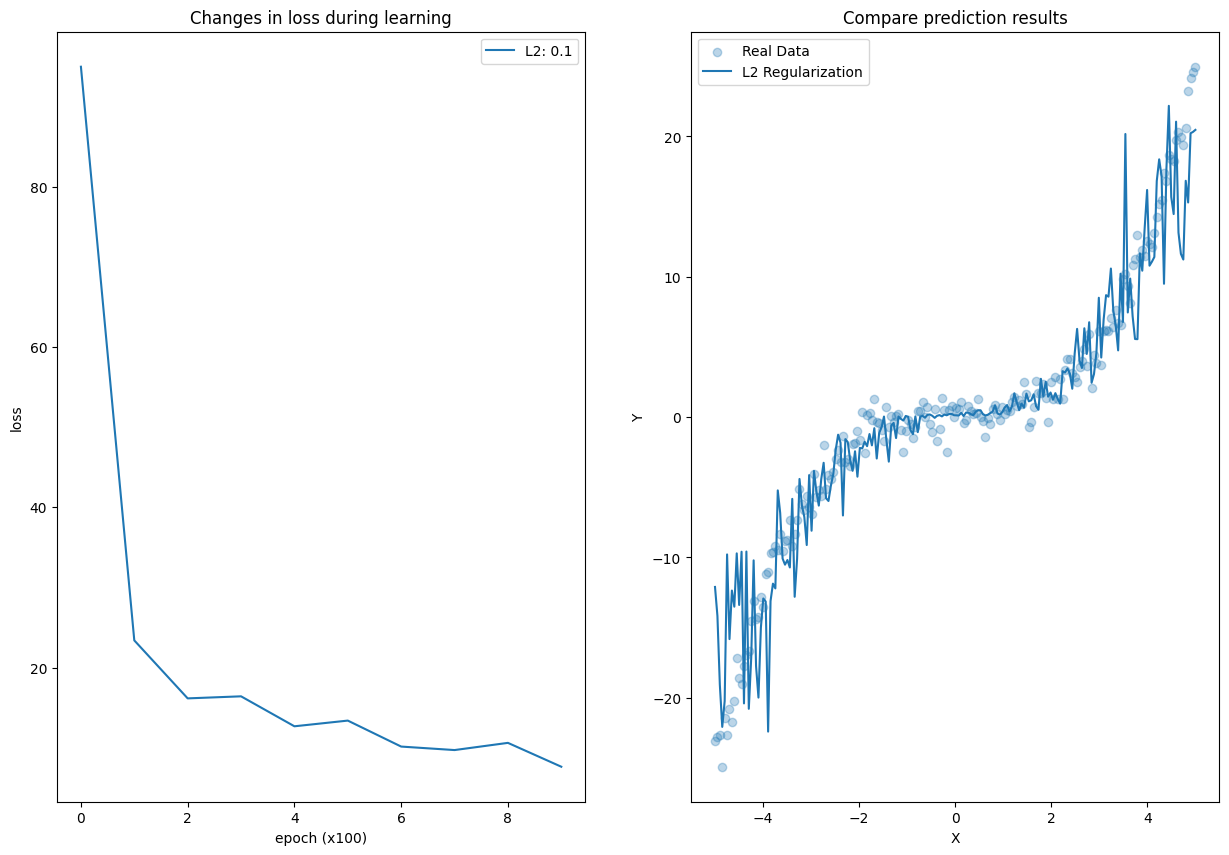

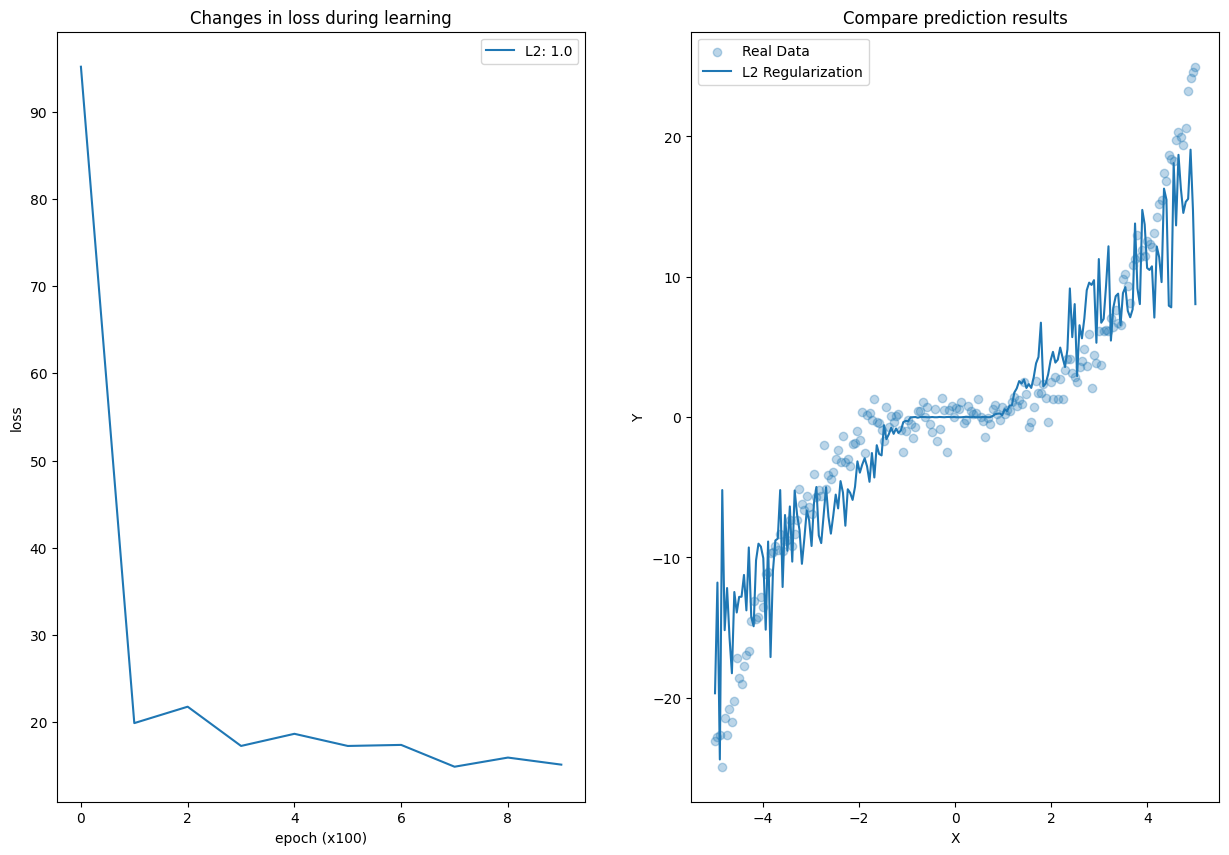

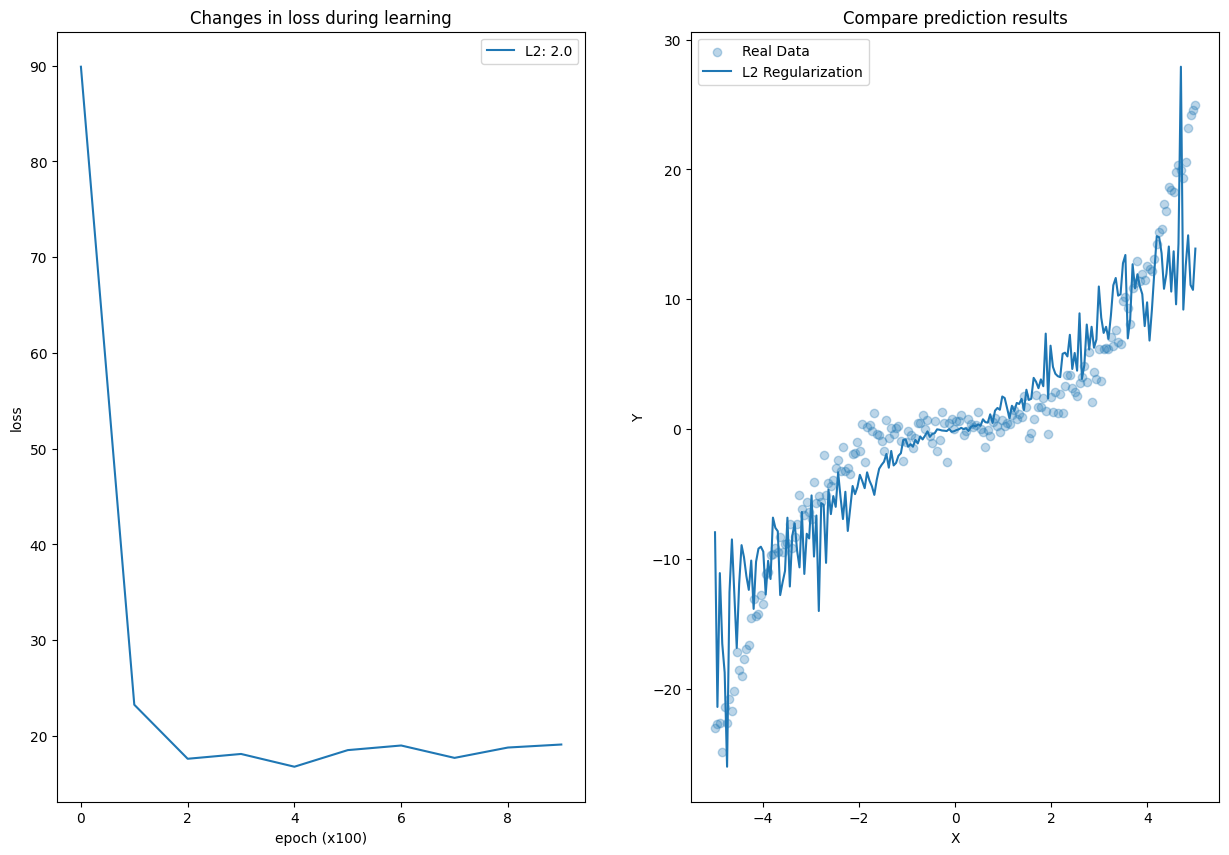

In [ ]:
# 실험 실행
l2_regularization()

### 주의사항

1. Regularization

- 너무 강한 Regularization은 학습을 방해할 수 있습니다.
- 데이터셋 크기와 모델 복잡도에 따라 적절한 강도를 찾아야 합니다.


2. 데이터 증강

- 도메인에 맞는 증강 기법을 선택해야 합니다.
- 너무 강한 증강은 데이터의 특성을 해칠 수 있습니다.
- 증강된 데이터가 현실적이어야 합니다.